Activity 2
scikit-learn comes with a few small standard datasets
that do not require to download any
file from some external website. 


The wine dataset, includes 13 Attributes, 178 Instances and
3 Classes. These data are the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the quantities of
13 constituents found in each of the three types of wines.


Use Python to train a decision tree classifier on the wine dataset. Don’t use the full dataset
for training. Use 70% and the rest, save it for testing.

In [325]:
from sklearn import datasets
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
from sklearn. model_selection import cross_val_score
from sklearn.datasets import load_wine
wine_data = load_wine()

In [306]:
from sklearn.datasets import load_wine
wine_data = load_wine()

In [307]:
inputs = wine_data.data
outputs = wine_data.target


In [308]:
df = pd.DataFrame(inputs,columns=wine_data.feature_names)
df = pd.concat([df,pd.DataFrame(outputs)],axis=1)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  0    

In [310]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
0                               0
dtype: int64

In [311]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


C:\Users\v.tsouvalakis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='count'>

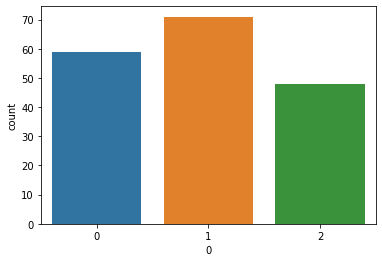

In [312]:
import seaborn as sns
sns.countplot(df[0])

<AxesSubplot:>

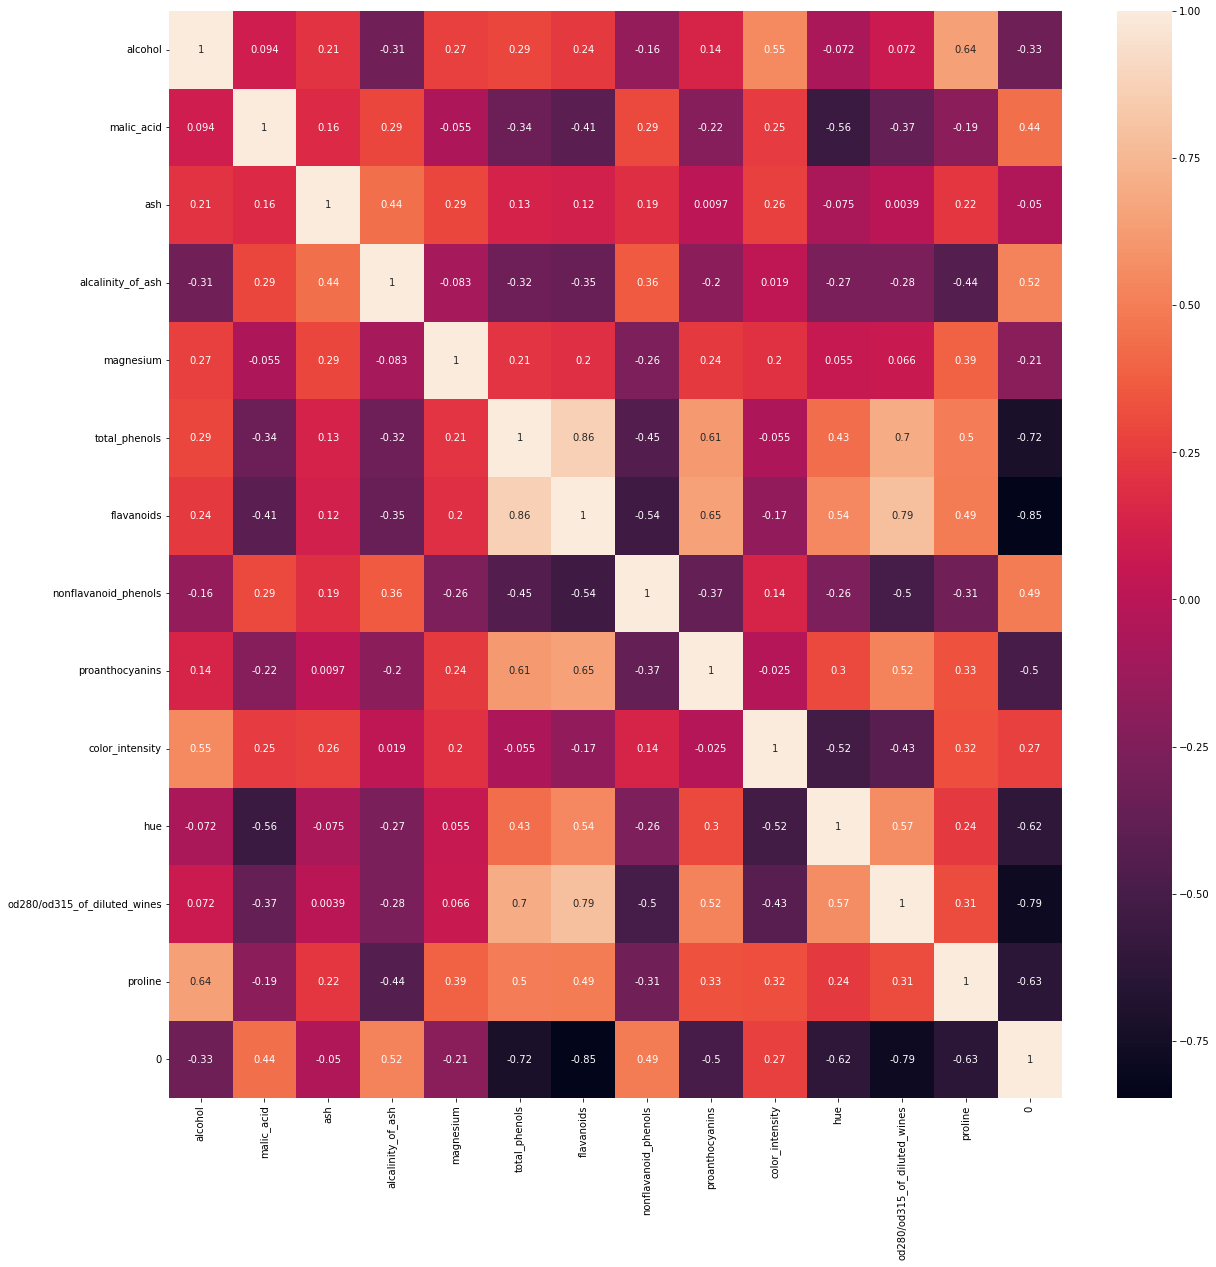

In [313]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [314]:
df.rename(columns={0:'target'},inplace=True)

In [315]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [316]:
x=df.drop('target',axis=1)
y = df['target']

In [317]:
# create training and test datasets to train the algorithm and we set stratify=y to distribute the data properly
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.3)

In [318]:
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",y_test.shape)

x_train shape (124, 13)
y_train shape (124,)
x_test shape (54, 13)
y_test shape (54,)


In [322]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [323]:

from sklearn.metrics import classification_report,accuracy_score
y_pred_train = classifier.predict(x_train)


print('Results for Categorical Model in the train dataset')
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))


Results for Categorical Model in the train dataset
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        33

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [324]:
# lets check our model in the test set

y_pred_test = classifier.predict(x_test)


print('Results for Categorical Model in the test dataset')
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

Results for Categorical Model in the test dataset
0.9444444444444444
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.95      0.90      0.93        21
           2       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



Accuracy score in the training dataset is higher than the test dataset,this means that our model overfits, this is happening beacuse the decision trees are non parametric model, meaning that there are not any default parameters to prevent overfitting in the model so the classifier try to adapt and learn the training dataset so we have the overfiting situation,

there are many things we can do to improve our model, the first thing is to limit the max depth of the model, this will help our model to regularize better and perform better in the test dataset


lets plot the max depth versus accuracy to see what number is the optimal

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

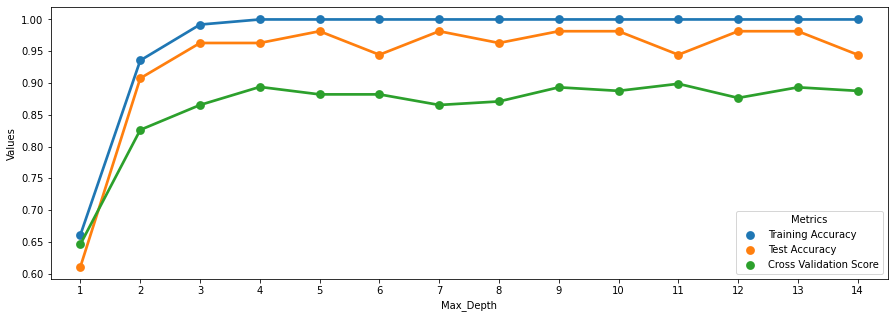

In [326]:
train_data = []
test_data = []
tree_depths = []
cross_validation = []


for i in range(1,15):
    classifier_ = DecisionTreeClassifier(max_depth=i)
    classifier_.fit(x_train,y_train)
    y_training_pred = classifier_.predict(x_train)
    y_test_pred=classifier_.predict(x_test)

    
    training_acc = accuracy_score(y_train,y_training_pred)
    test_acc = accuracy_score(y_test,y_test_pred)
    cv_scores = cross_val_score(classifier_, x, y, cv=5, scoring='accuracy').mean()
   
    
 
    
    
    train_data.append(training_acc)
    test_data.append(test_acc)
    cross_validation.append(cv_scores)
   
    
  
   
   
    tree_depths.append(i)
    

Tuning_Max_depth = {"Training Accuracy": train_data,"Test Accuracy":test_data, "Max_Depth": tree_depths,"Cross Validation Score":cross_validation}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

### As we can see from the above chart, a good number for max depth is 3 , lets put a limit on this parameter

In [327]:
##Set a max depth for the model
from sklearn.tree import DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(max_depth=3)
classifier_2.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [328]:

y_pred_train = classifier_2.predict(x_train)


print('Results for Categorical Model in the train dataset')
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))

Results for Categorical Model in the train dataset
0.9919354838709677
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.98      1.00      0.99        50
           2       1.00      1.00      1.00        33

    accuracy                           0.99       124
   macro avg       0.99      0.99      0.99       124
weighted avg       0.99      0.99      0.99       124



In [329]:
y_pred_test = classifier_2.predict(x_test)

print('Results for Categorical Model in the test dataset')
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

Results for Categorical Model in the test dataset
0.9814814814814815
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### AS we can see we improved our model in the test dataset beacuse we limited the freedom of the model by adding the max_depth parameter

# Working with another classification dataset

In [330]:
data = datasets.load_breast_cancer()

In [331]:
# Import pandas
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [332]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

C:\Users\v.tsouvalakis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

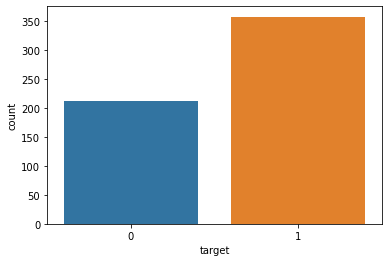

In [333]:
import seaborn as sns 
sns.countplot(df['target'])

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [335]:
x= df.drop('target',axis=1)
y = df['target']

In [336]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.3)


In [337]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
469,11.620,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
443,10.570,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
362,12.760,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.12980,0.18390,0.12550,0.08312,0.2744,0.07238
271,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772
300,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929
220,13.650,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.1360,0.06344,...,15.34,16.35,99.71,706.2,0.13110,0.24740,0.17590,0.08056,0.2380,0.08718
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061


In [338]:
corr_matrix=df.corr()
corr_matrix["target"].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

In [340]:

from sklearn.tree import DecisionTreeClassifier
classifier_3 = DecisionTreeClassifier()
classifier_3.fit(x_train,y_train)


DecisionTreeClassifier()

In [341]:

y_pred_train = classifier_3.predict(x_train)


print('Results for Categorical Model in the train dataset')
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))

Results for Categorical Model in the train dataset
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       250

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



In [290]:
# generate classification report using predictions for categorical model

y_pred_test = classifier_3.predict(x_test)


print('Results for Categorical Model in the test dataset')
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

Results for Categorical Model in the test dataset
0.9239766081871345
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [296]:
##We see that we our model overfits again and dont perform well in the test dataset


<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

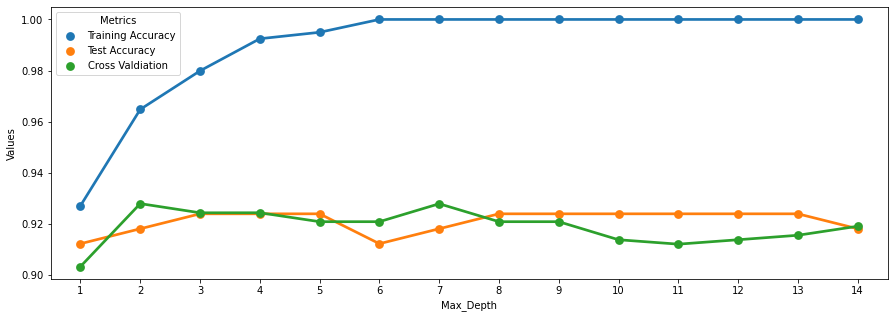

In [342]:
train_data = []
test_data = []
tree_depths = []
cross_validation = []

for i in range(1,15):
    classifier_ = DecisionTreeClassifier(max_depth=i)
    classifier_.fit(x_train,y_train)
    
    cv_scores = cross_val_score(classifier_, x, y, cv=5, scoring='accuracy').mean()
    y_training_pred = classifier_.predict(x_train)
    y_test_pred=classifier_.predict(x_test)

    
    training_acc = accuracy_score(y_train,y_training_pred)
    test_acc = accuracy_score(y_test,y_test_pred)
    cross_validation.append(cv_scores)
   
    
 
    
    
    train_data.append(training_acc)
    test_data.append(test_acc)
   
    
  
   
   
    tree_depths.append(i)
    

Tuning_Max_depth = {"Training Accuracy": train_data,"Test Accuracy":test_data, "Max_Depth": tree_depths,"Cross Valdiation":cross_validation}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)


In [343]:
from sklearn.tree import DecisionTreeClassifier
classifier_4 = DecisionTreeClassifier(max_depth=3,ccp_alpha=0.01)
classifier_4.fit(x_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)

In [344]:

y_pred_train = classifier_4.predict(x_train)


print('Results for Categorical Model in the train dataset')
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_train,y_pred_train))

Results for Categorical Model in the train dataset
0.9773869346733668
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.98      0.98      0.98       250

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [345]:
y_pred_test = classifier_4.predict(x_test)


print('Results for Categorical Model in the test dataset')
print(accuracy_score(y_test, y_pred_test))
print(classification_report(y_test,y_pred_test))

Results for Categorical Model in the test dataset
0.9239766081871345
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.94      0.94      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [346]:
##the last model regularize better than the model without any restrictions 

## In general the decision tree are very good and accurate algorithm(based on the algorithm are build other very powerfull algorithms like random forest and xgboost which perform very well),the algorithm dont need any feature scaling in the input data and it does not make any asumptions like other models,but as we mention above we need to limit the freedom of the algorithm because it is exposed to overifitting in the training dataset and perform poorly in the test dataset.
